# Amazon User Reviews Sentiment Analysis 

What was the last thing that you purchased on Amazon? Chances are, if it was not a repeat buy, you read the user reviews before making the purchase decision. Often we look at highest and lowest star reviews to find out about possible issues and hope we too would have that wonderful 5-star experience as well. Good reviews mean good business as they increase confidence in potential buyers. 

It is vital for companies to track their user reviews to determine polarity of their products. Sentiment analysis [subfield of Natural Language Processing (NLP)] can be used to sift through structured and unstructured text documents and extracting meaning and insights. 

In this project, we will identify good and bad reviews from Amazon commerce data downloaded from data.world. 
Using Python **NLTK library** and **Scikit Learn**, we will clean and explore the dataset first, then apply sentiment analysis using bayesian modeling. 

   [Exploratory Data Analysis ](explore)  
   
   [Text Processing ](text)  
   
   [Sentiment Analysis ](sentiment)  
   
   [Error Analysis](error)  

Project Resources: [Udemy: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/t/lecture/5733564?start=0)  
Project Dataset: [Amazon commerce web scraping sample sourced from: Data.world](https://data.world/promptcloud/fashion-products-on-amazon-com)  
Yelp review example: [Sentiment Analysis for Yelp reviews](https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9)

## Exploratory Data Analysis <a name="explore"></a>

In [1]:
import pandas as pd
import numpy as np
import string
import re

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("Set2", 10)
sns.set_palette(pal)

In [2]:
df=pd.read_csv('input/amazon_co-ecommerce_sample.csv')
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [3]:
df.shape

(10000, 17)

#### Exploring product manufacturers 

The dataset has 10000 rows containing 10000unique products. 
We will explore the manufacturers of these products and their main categories. 

In [4]:
#Complete list of manufacturers
df['manufacturer'].value_counts()

LEGO                                            171
Disney                                          167
Oxford Diecast                                  156
Playmobil                                       147
Star Wars                                       120
Mattel                                          114
Hasbro                                          110
The Puppet Company                              109
MyTinyWorld                                      93
Corgi                                            90
Hornby                                           87
Scalextric                                       76
Pokémon                                          69
Schleich                                         68
Amscan                                           65
Every-occasion-party-supplies                    62
Melissa & Doug                                   59
FunKo                                            59
Papo                                             58
Tamiya      

There are 2651 manufacturers in the dataset, we can explore the top manufacturers in a pie plot with a pie chart. 
This allows us to see that the products in the dataset are possible in the toy category. 

In [5]:
## PManufacturers
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

labels = df['manufacturer'].value_counts().index[0:50]
values = df['manufacturer'].value_counts().tolist()[0:50]

trace = go.Bar(x=labels, y=values)
py.iplot([trace])

#### Exploring product categories

In [6]:
def extract_category(text):
    category =[]
    if len(text)>0:
        category=re.split('\ > ',text)[0]
    return category

df.loc[:, 'category']=df['amazon_category_and_sub_category'].apply(lambda x: extract_category(str(x)))
df.category.value_counts()

labels = df['category'].value_counts().index
values = df['category'].value_counts().tolist()

trace = go.Bar(x=labels, y=values)
py.iplot([trace])

##  Text processing <a name="text"></a>

**Exploring product reviews**

The nested user reviews of each product are listed under customer reviews column. 

Now, we need to inspect the text data fields inside this customer reviews column to scrape the relevant information for individual reviews. 

In [7]:
df.customer_reviews[0]

"Worth Buying For The Pictures Alone (As Ever) // 4.0 // 6 April 2014 // By\n    \n    Copnovelist\n  \n on 6 April 2014 // Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography. // 5.0 // 11 April 2015 // By\n    \n    richard\n  \n on 11 April 2015 // Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase' // 5.0 // 23 April 2014 // By\n  

Looks like user reviews for a certain product are split by '|' character, and within each user review we have review title, rating, review data, by user and review text body all separated by '//'. Now we can extract these fields by text processing.

In [8]:
def process_customer_reviews(text):
    #separate individual reviews
    ratings, title, usrname, rev, dates, =[],[],[],[],[]
    if len(text)>0:
        #generate list of user reviews per item 
        listrev=re.split('\|',text) 
        
        #split fields of user review
        lrev=[re.split('\//',x) for x in listrev] 
        
        # access fields of user review
        title=[x[0] for x in lrev]
        ratings=[x[1] for x in lrev if len(x)==5]
        dates=[x[2] for x in lrev if len(x)==5]
        usr=[re.split('[\n]',x[3]) for x in lrev if len(x)==5]
        usrname=[str.lstrip(x[2]) for x in usr if len(x)>2]  # remove leading spaces
        rev=[x[4] for x in lrev if len(x)==5]
        
    return  pd.Series([ratings,title,usrname,rev,dates])

amz=pd.DataFrame()
amz[['ratings','titles','usrnames','reviews','dates']]=df['customer_reviews'].apply(lambda x: process_customer_reviews(str(x)))

In [9]:
amz.head()

,ratings,titles,usrnames,reviews,dates
0,"[ 4.0 , 5.0 , 5.0 , 5.0 , 5.0 , 5.0 , 5....",[Worth Buying For The Pictures Alone (As Ever)...,"[Copnovelist, richard, Pinkhandbag, Gary John ...",[ Part of the magic for me growing up as a boy...,"[ 6 April 2014 , 11 April 2015 , 23 April 20..."
1,"[ 4.0 , 5.0 ]","[Four Stars , Five Stars ]","[kenneth bell, moosixty]",[ Very happy with the communication with funky...,"[ 18 Dec. 2015 , 14 Jan. 2016 ]"
2,"[ 5.0 , 5.0 , 5.0 , 1.0 , 1.0 , 4.0 , 5....","[**Highly Recommended!** , Excellent product ...","[Simon.B :-), Trevor, Janet, ann milburn, T. F...",[ Simple & GREAT FUN for 5+My nephews face was...,"[ 26 May 2015 , 29 Jun. 2014 , 20 Aug. 2015 ..."
3,[ 5.0 ],[I love it ],[Lilla Lukacs],[ I love it. Perfect with the earlier ordered ...,[ 22 July 2013 ]
4,"[ 5.0 , 4.0 , 5.0 ]","[Birthday present , john burns , Get that st...","[Love my Dog, john burns, George A. Nott]",[ Bought this for my Grandson's birthday. He ...,"[ 14 April 2014 , 17 Jan. 2014 , 2 Nov. 2015 ]"


Now, we will create a new dataframe where each row only contains a single review, instead of list of review records per item. We will also create a new feature based on review text lenght. 

In [10]:
reviews = []
ratings = []

for _, row in amz.iterrows():   
    for rt in row.ratings:
        ratings.append(rt)
        
    for i in range(len(row.ratings)):
        reviews.append(row.reviews[i])

amzdf= pd.DataFrame({"rating": ratings, "review": reviews})

amzdf['text_length']=amzdf.review.apply(lambda x:len(str(x)))

amzdf['rating']=amzdf['rating'].astype(dtype=np.float64)

amzdf.head(10)

,rating,review,text_length
0,4.0,Part of the magic for me growing up as a boy ...,443
1,5.0,"Amazing detail, every credit to the photograp...",269
2,5.0,This was purchased on behalf of my Dad. He is...,245
3,5.0,Everything I really needed to see what was on...,144
4,5.0,I collect them all as the glossy pictures are...,112
5,5.0,What a great book. Extremely useful insight ...,80
6,5.0,Useful info for someonelike me starting back ...,78
7,5.0,A well produced very good quality catalogue.S...,68
8,4.0,Very happy with the communication with funkyb...,50
9,5.0,Great buy.,11


In [11]:
amzdf.shape

(29494, 3)

After creating the new dataframe, we now have almost 30K individual reviews organized as single review per row.

**What is the number of occurrences for each type of star rating?**

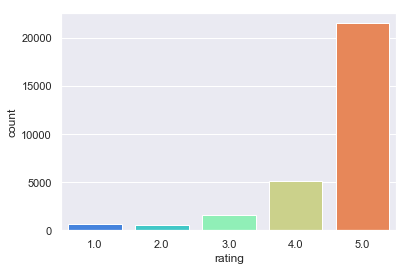

In [12]:
sns.countplot(x='rating',data=amzdf,palette='rainbow')
plt.show()

Dataset is highly skewed towards 4 and 5 star reviews, this may cause some issues down the line for our analysis.   

Next question is if the text length indicative of review rating. 

**Histograms of text length based off of the review ratings.**

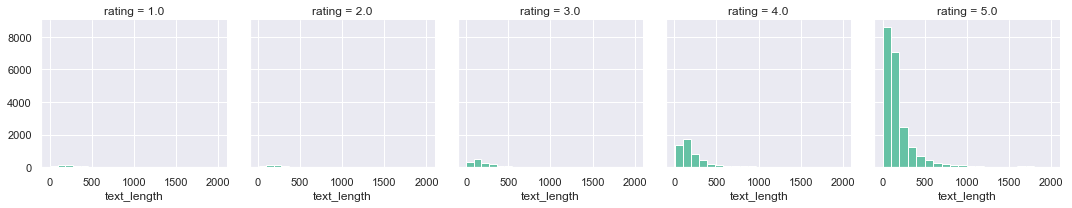

In [13]:
g = sns.FacetGrid(data=amzdf, col='rating')
g.map(plt.hist, 'text_length', bins=20)
plt.show()

Distribution of text_length for 1 and 2 star ratings are dwarfed by others. 

#### Is text lenght distribution correlated with rating? 

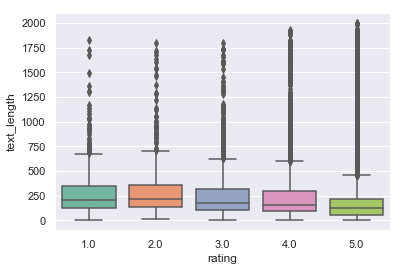

In [14]:
sns.boxplot(x='rating', y='text_length', data=amzdf)
plt.show()

From the plot, looks like the 1-star and 2-star ratings have longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.


## Sentiment Analysis <a name="sentiment"></a>

** Dependent and independent variables for predicting review polarity ** 

Since the number of reviews are highly skewed towards 5 star ratings, I will combine 1 and 2 star rewviews into bad reviews and 5 star reviews into good review class. 

So our dependent value is class feature, and independent values will be processed review text data.

In [15]:
data = amzdf[(amzdf['rating'] == 1) | (amzdf['rating'] == 2) |(amzdf['rating'] == 5)]
data['class']=data.rating.apply(lambda x: 0 if x <5 else 1 )
data.shape

data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,rating,review,text_length,class
1,5.0,"Amazing detail, every credit to the photograp...",269,1
2,5.0,This was purchased on behalf of my Dad. He is...,245,1
3,5.0,Everything I really needed to see what was on...,144,1
4,5.0,I collect them all as the glossy pictures are...,112,1
5,5.0,What a great book. Extremely useful insight ...,80,1


#### Creating a separate holdout set 

It is important to create a separate test data to see how to model generalize to new samples.  

This can be achieved using Scikit learn library model selection methods. 

In [16]:
import numpy as np
np.random.seed(42)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['review'], data['class'], test_size=0.2)

In [17]:
X_train

16148     Very good quality chess. Not too big so ideal...
5729                     Fake face tattoos - all in order.
8498      Some of order missing. Ballons i got were all...
8550           Great balloons and blow up to a great size 
12700     I love this little chap. It's really soft and...
21603     This Jigsaw must have more grease than a chip...
5856      I ordered this for my friend for her daughter...
188                            Just what I was looking for
23666     this doll is beautiful, my daughter loves her...
22383                                 usual Tamiya quality
18522     Bought these as an extra for my Grandson's 6t...
23485                                      Beautiful doll.
20820     Read about this little fella and just had to ...
12556     Gorgeous plush, looks like it should, and it ...
2632      I bought this kit many years ago when they st...
26349     Transformers have sustained appeal with boys ...
4291      These are high quality stickers that give a p.

#### Preprocessing the text data

Using NLTK and string library we will get rid of punctuations, and then lower all words. we will then split the text and remove the ones from stopwords corpus (such as “the”, “a”, “an”, etc.) to limit our features to a more meaningful set.


In [18]:
import nltk
import string

In [19]:
stopwords = nltk.corpus.stopwords.words('english')

In [20]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [21]:
sample_text=amzdf.review[0]
print("Sample text:")
print(sample_text)

Sample text:
 Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. 


In [22]:
print(clean_text(sample_text))

['', 'part', 'magic', 'growing', 'boy', 'buy', 'given', 'new', 'hornby', 'catalogue', 'every', 'year', 'even', 'included', '90', 'products', 'previous', 'year', 'ive', 'still', 'got', 'old', 'ones', 'dating', 'back', '70s', '80s', 'somewhere', 'days', 'catalogue', 'especially', 'informative', 'tells', 'vintage', 'rolling', 'stock', 'useful', 'dedicating', 'railway', 'one', 'particular', 'era', 'train', 'company', '']


** Creating a bag of words approach from the dataset **

Classification needs the independent features in a vector format. The simplest way to convert words of text corpus to a vector format is the bag-of-words approach, where each unique word in a text will be represented by one number.

This can be achieved by using CountVectorizer from scikit learn tools. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_transformer = CountVectorizer(analyzer=clean_text).fit(X_train)

It is important to apply the bag-of-word(bow) transformer to only the training data so we are not biasing the performanc on holdout test set.

We can check the size of bag of words and feature names as follows: 

In [25]:
len(bow_transformer.vocabulary_)


26076

In [26]:
print(bow_transformer.get_feature_names()[1000:1010])

['acceptably', 'accepted', 'accesories', 'accesorisefashion', 'access', 'accessed', 'accessible', 'accessing', 'accessoires', 'accessories']


** Let's see how the bow transformer works on a sample review: **

In [27]:
sample_review = X_train[21825]
sample_review

' My two year-old son adores this puzzle. As with all Orchard puzzles there is a lot going on so the pieces are easily differentiated. My son loves counting all the different animals and putting the numbers in order up the tree. It has been a great way for him to become familiar with written numbers and the order they go in. The pieces are large and easy for small hands to put in place and it comes with a poster which is a bonus. '

In [28]:
bowed_sample_review = bow_transformer.transform([sample_review])
bowed_sample_review

<1x26076 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

The bag-of-words transformer will create a sparse matrix that will be populated if the input text contains the ith word from the bag of words or not. We can print the transformed sample review and explore how it was vectorized. 

In [29]:
print(bowed_sample_review)

  (0, 0)	2
  (0, 1181)	1
  (0, 1665)	1
  (0, 2764)	1
  (0, 3322)	1
  (0, 5190)	1
  (0, 5739)	1
  (0, 6872)	1
  (0, 6874)	1
  (0, 7663)	1
  (0, 7679)	1
  (0, 8711)	1
  (0, 10246)	1
  (0, 10283)	1
  (0, 10514)	1
  (0, 10869)	1
  (0, 13161)	1
  (0, 13800)	1
  (0, 13853)	1
  (0, 15646)	2
  (0, 16064)	1
  (0, 16068)	2
  (0, 17015)	2
  (0, 17140)	1
  (0, 17562)	1
  (0, 18262)	1
  (0, 18265)	1
  (0, 18271)	1
  (0, 18281)	1
  (0, 21111)	1
  (0, 21340)	2
  (0, 23934)	1
  (0, 24205)	1
  (0, 25141)	1
  (0, 25781)	1
  (0, 25893)	1


In [30]:
print(bow_transformer.get_feature_names()[13853])
print(bow_transformer.get_feature_names()[15646])
print(bow_transformer.get_feature_names()[16068])
print(bow_transformer.get_feature_names()[17015])
print(bow_transformer.get_feature_names()[21340])

loves
numbers
order
pieces
son


** Transforming training and test datasets **

In [31]:
Xtrbow = bow_transformer.transform(X_train)
Xtestbow = bow_transformer.transform(X_test)

In [32]:
print('Shape of Sparse Matrix: ', Xtrbow.shape)
print('Amount of Non-Zero occurrences: ', Xtrbow.nnz)

# Percentage of non-zero values
density = (100.0 * Xtrbow.nnz / (Xtrbow.shape[0] * Xtrbow.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (18165, 26076)
Amount of Non-Zero occurrences:  332064
Density: 0.07010442321365394


** Training our model **

[Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) is a specialised version of Naive Bayes designed for text documents.

The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$,
where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature $i$ appearing in a sample belonging to class $y$.

The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:

$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$

where $N_{yi} = \sum_{x \in T} x_i$  is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_{y} = \sum_{i=1}^{n} N_{yi}$ is the total count of all features for class $y$.

Let’s build a Multinomial Naive Bayes model and fit it to our training set (X_train and y_train).

In [33]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(Xtrbow, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
preds = nb.predict(Xtestbow)

## Error Analysis <a name="error"></a>

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[  33  205]
 [   4 4300]]


              precision    recall  f1-score   support

           0       0.89      0.14      0.24       238
           1       0.95      1.00      0.98      4304

   micro avg       0.95      0.95      0.95      4542
   macro avg       0.92      0.57      0.61      4542
weighted avg       0.95      0.95      0.94      4542



Looking at macro avg value, we see that our model can predict whether a user liked their amazon purchase based on their product review to 92% accuracy. 

Since the dataset is highly skewed towards 5-star reviews, our model learned them quite well. 
According to the confusion matrix, only 4 of the 5-star reviews were misclassifed as bad reviews.

** Let's look at missed good reviews!**

In [36]:
import numpy as np

y_test = np.asarray(y_test)
missedgood = np.where((preds==0) & (y_test==1))
missedgood

(array([ 882, 1428, 1509, 4453]),)

In [37]:
X_test.iloc[1509]

" Excellent model in perfect condition from reputeable amazon seller, however it was returned for a refund because it's couplings were not compatable with my other Railjet coaches. I was previously ignorant of the fact that Roco Railjet coaches with internal lighting do not have the same couplings as those without. Roco Railjet coaches 64722 / 64723 / 64724 have internal lighting powered through connections in the couplings."

In this case the user states that the purchased model is in perfect condition, but possibly since the review includes the word "refund", our classifier marks it as bad review. 

** Let's look bad reviews that were able to classified even with the data bias! **

In [38]:
foundbad = np.where((y_test == preds) & (y_test==0))
foundbad

(array([ 720,  822,  845,  914,  943, 1225, 1508, 1811, 1826, 1908, 2096,
        2111, 2112, 2274, 2378, 2538, 2585, 2743, 2853, 2868, 2937, 3074,
        3087, 3225, 3246, 3263, 3359, 3421, 3554, 3689, 4141, 4469, 4492]),)

In [39]:
X_test.iloc[845]

" Absolutely rubbish. Looks nothing like it does in the images provided. The banner itself it of a poor quality and the writing is squashed together. Also there are gaps where the ink has not taken. Severely disappointed. I know it's low priced but the quality is no where near to the standard shown on the images. "

In conclusion, although our model was a little biased towards positive reviews, it was fairly accurate with its predictions, achieving an accuracy of 92% on the test set.